In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Px4Vm3w11i0evtzxVIn7")
project = rf.workspace("objectdetection-dxeuw").project("face-detection-z1x9s")
version = project.version(1)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-detection-1 in yolov8:: 100%|██████████| 10111/10111 [00:01<00:00, 7311.43it/s]


In [2]:
def text_to_file(text,file_path):
    with open(file_path,'w') as file:
        file.write(text)
text = """
names:
- Face
- face

nc: 2

val:  /kaggle/working/face-detection-1/test/images
train: /kaggle/working/face-detection-1/train/images

"""
text_to_file(text, "output.yaml")

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
#/kaggle/working/output.yaml

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:

!yolo task=detect mode=train data=/kaggle/working/output.yaml model=yolov8s.pt epochs=10 imgsz=640 batch=16


100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 207MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/output.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

In [5]:
from IPython.display import Image, display

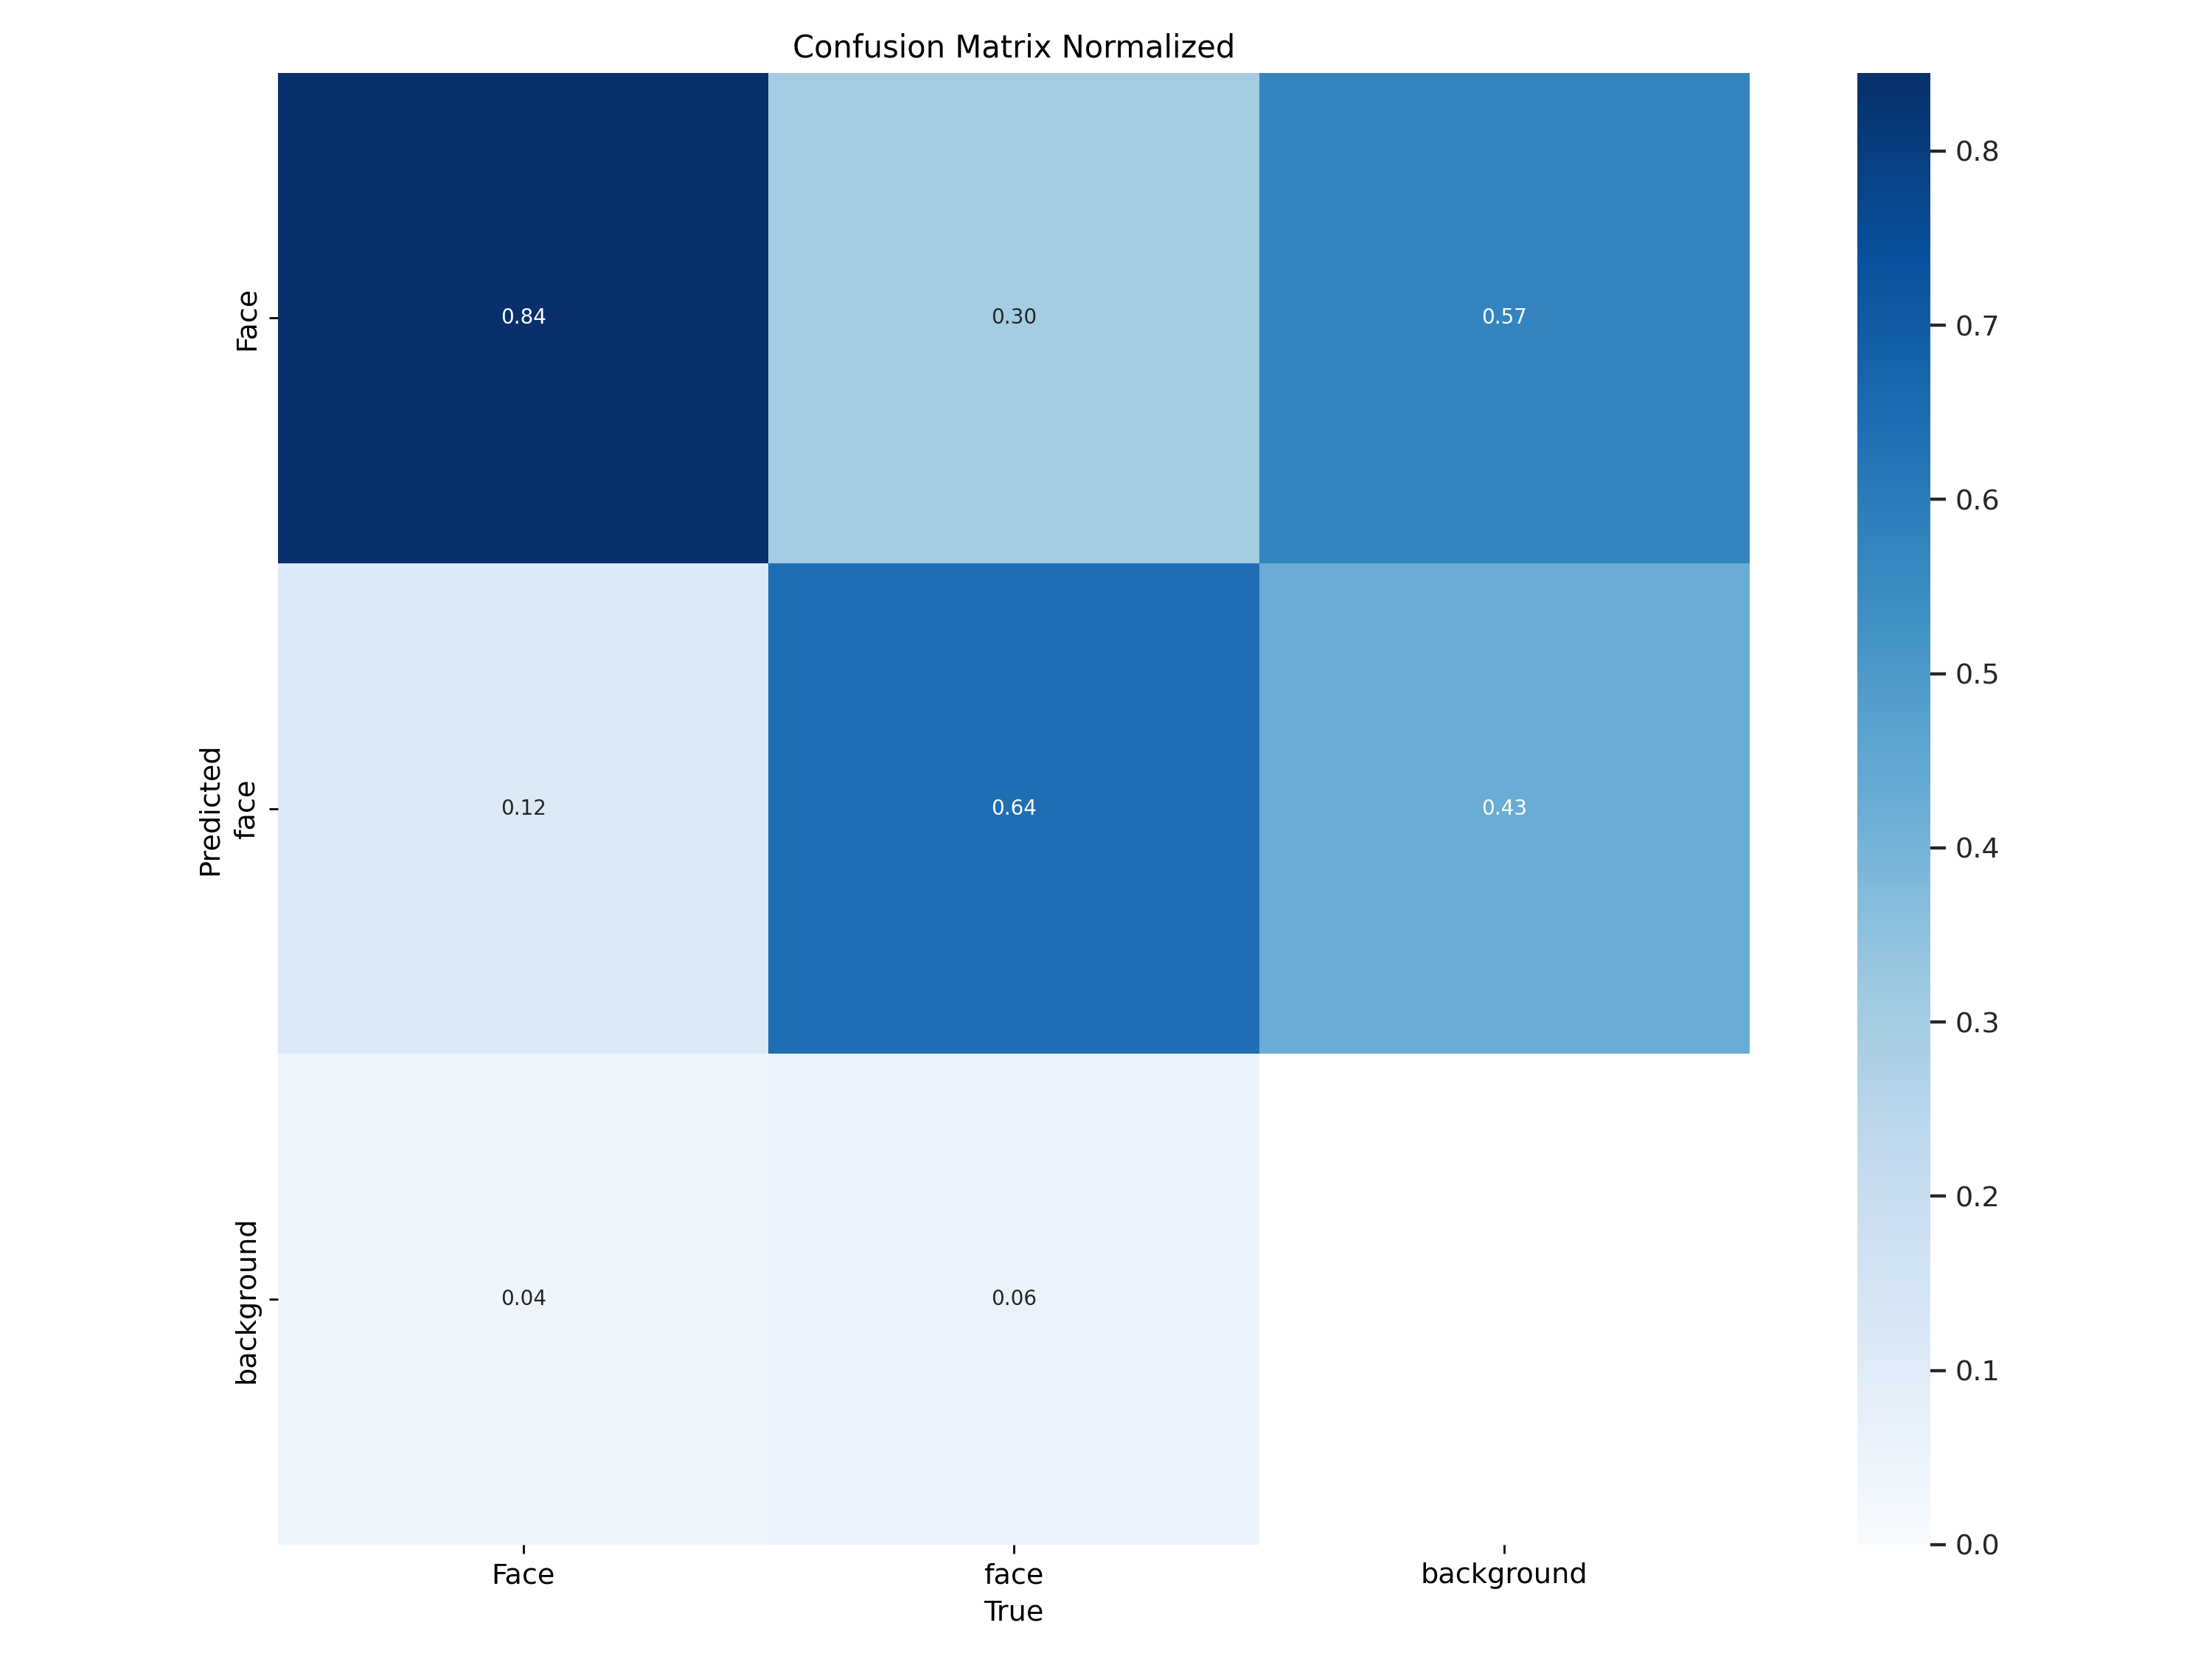

In [6]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix_normalized.png", width=1000))

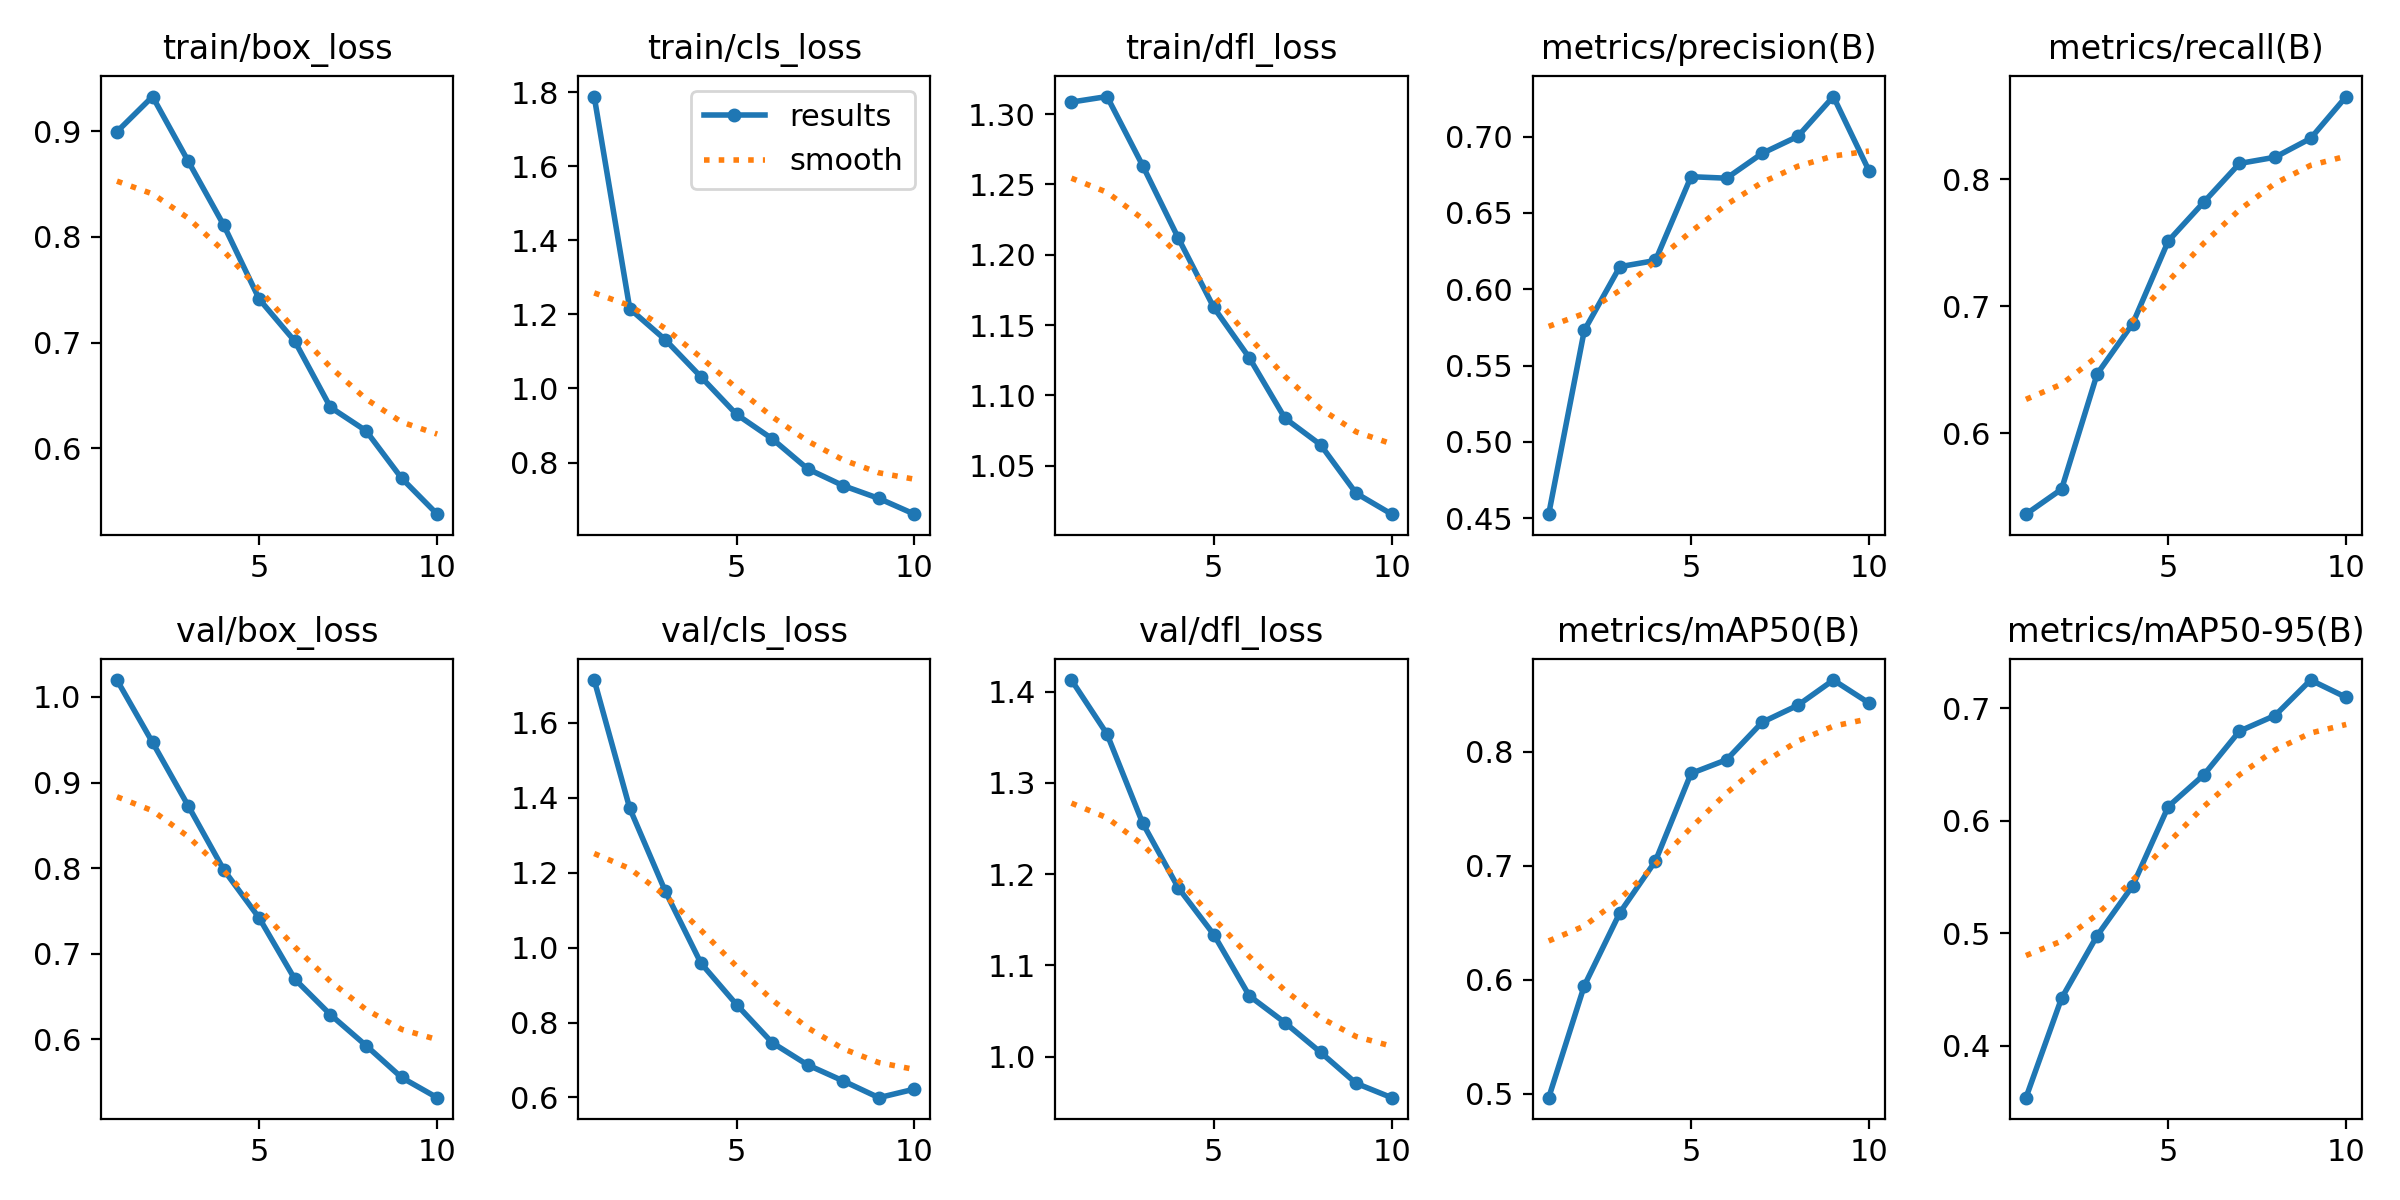

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

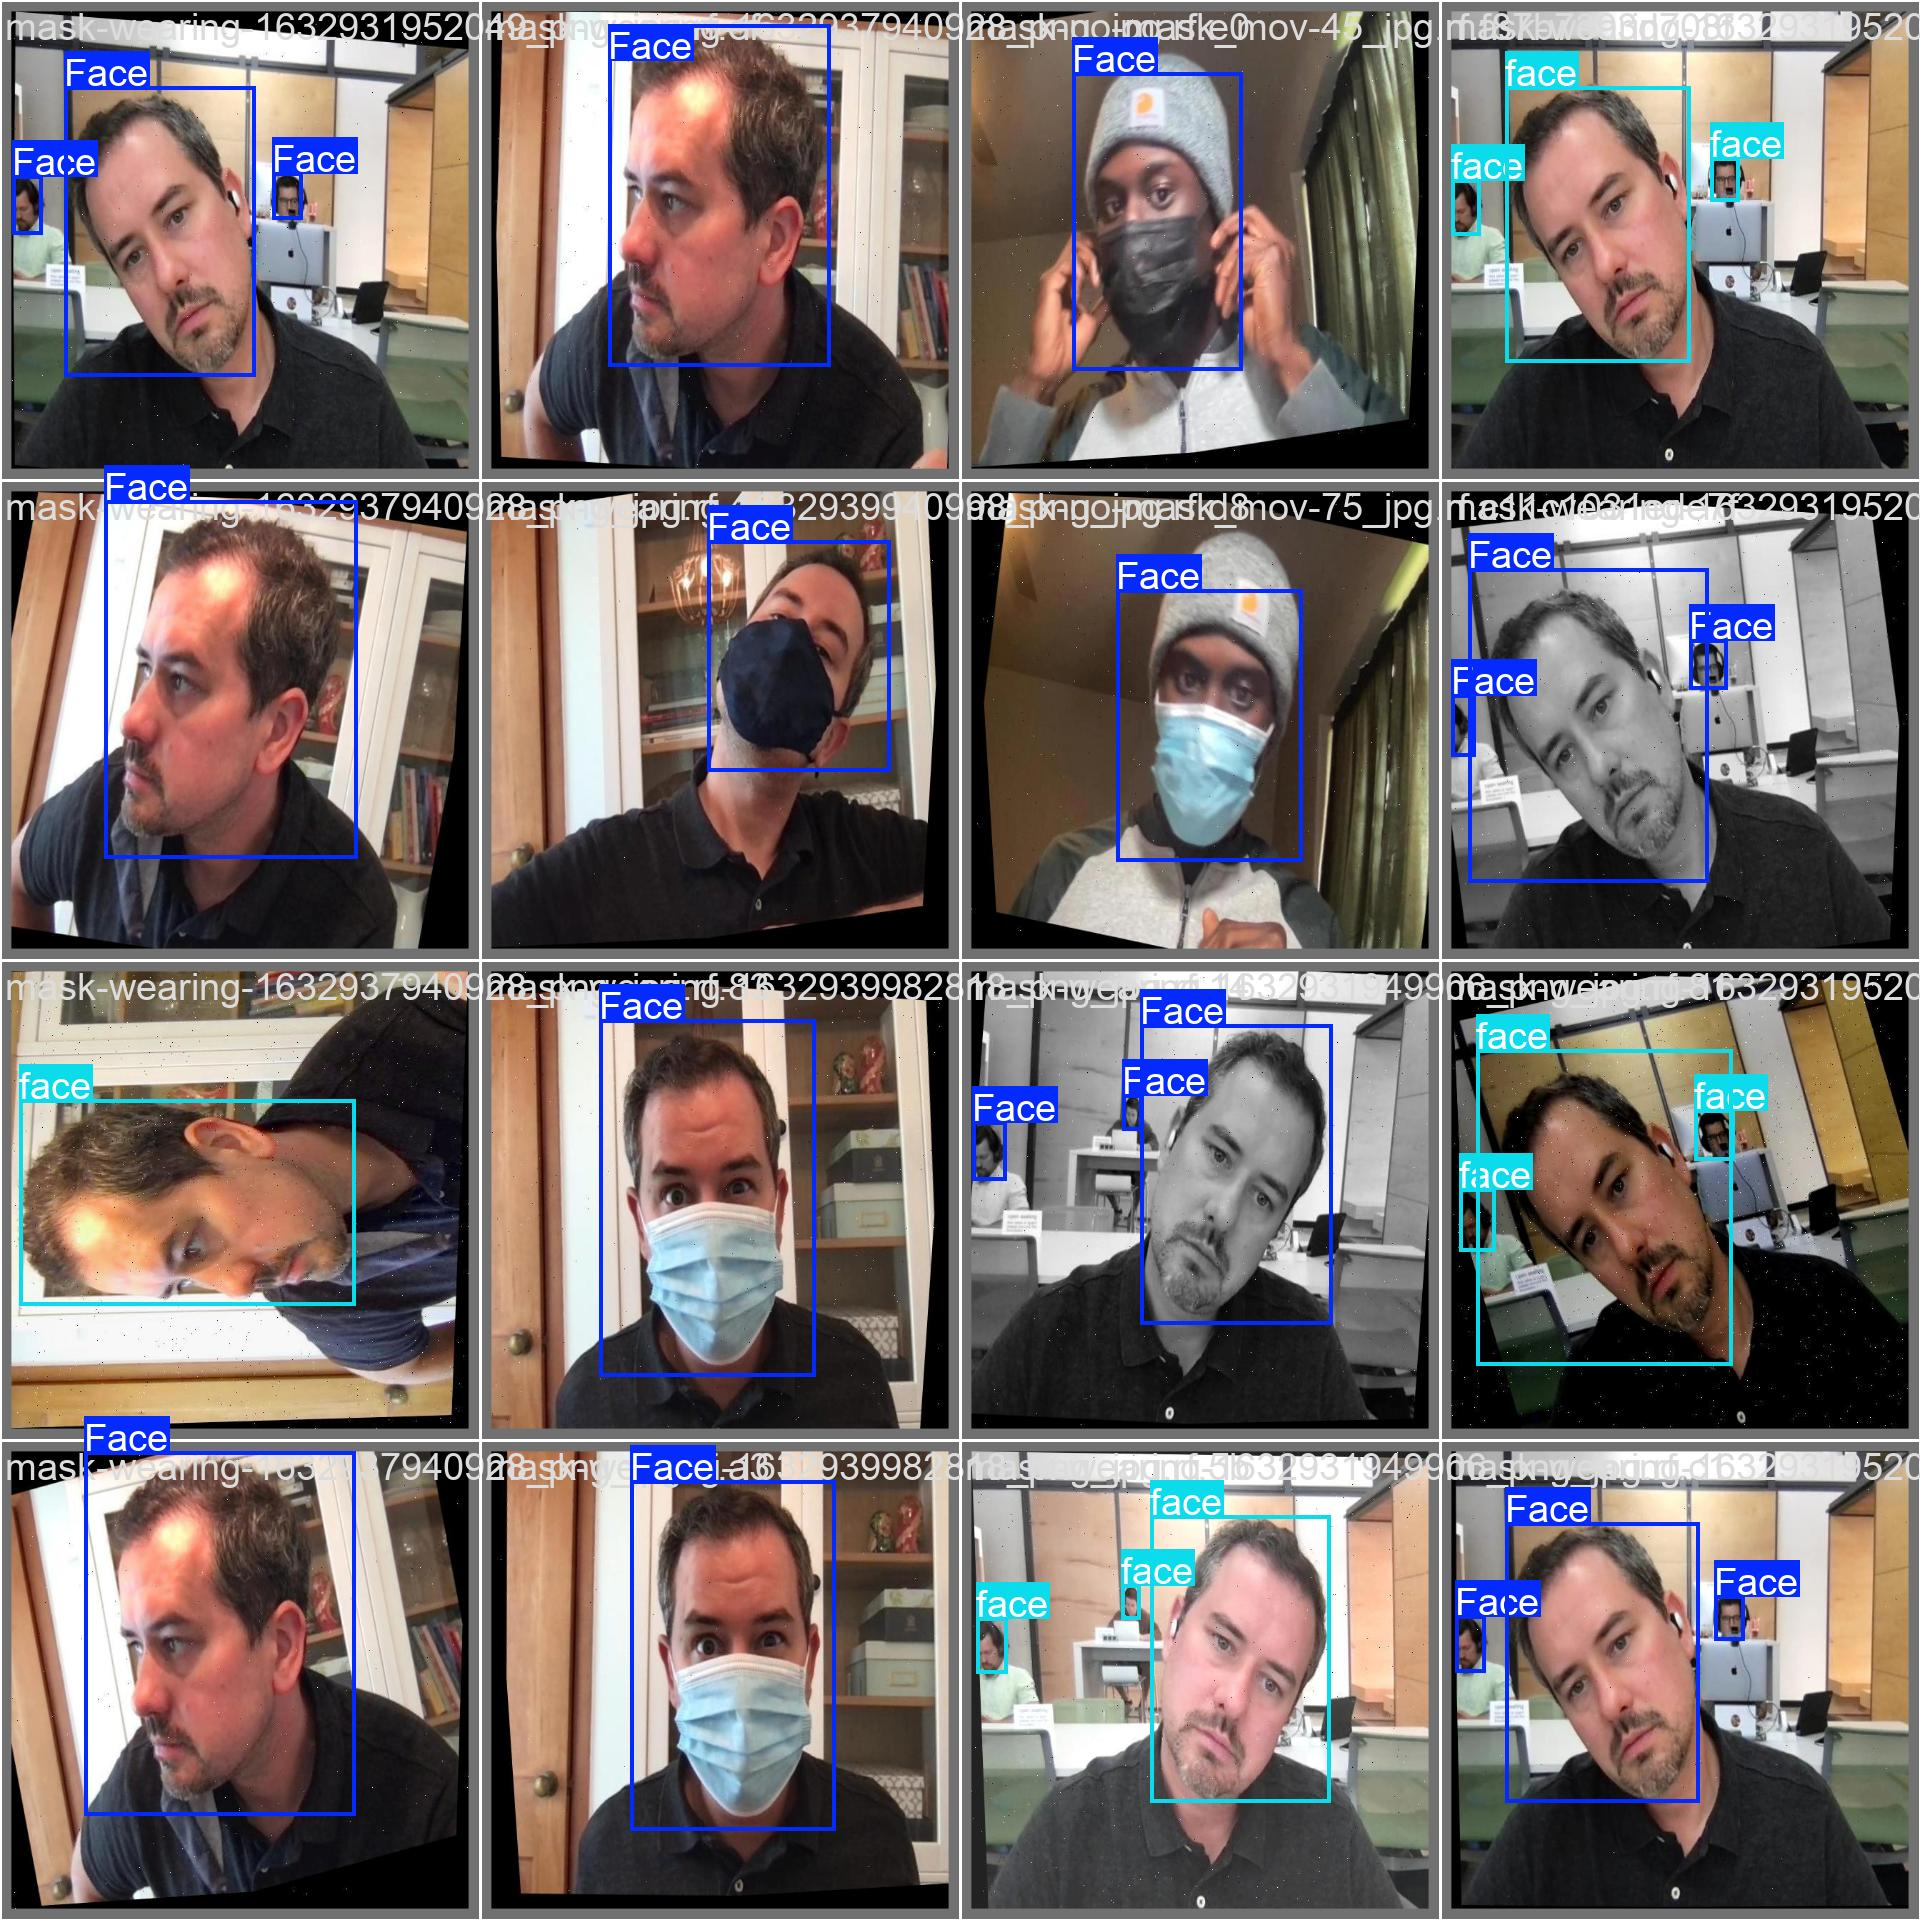

In [8]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=1000))

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/face-detection-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1513 /kaggle/working/face-detection-1/test/images/0_10725_jpg.rf.2211d1905defbdf8df9fe13f2191bc86.jpg: 640x640 3 Faces, 8.6ms
image 2/1513 /kaggle/working/face-detection-1/test/images/0_10725_jpg.rf.a2a7ce9d20e47c441ed87e73b35741a4.jpg: 640x640 2 Faces, 8.4ms
image 3/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.13a210b8f1b51dc497bb936285ae72b4.jpg: 640x640 1 Face, 8.4ms
image 4/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.4b93ceef452f206105e769dd650cd6b9.jpg: 640x640 1 Face, 8.5ms
image 5/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.4f1bac551eface241ef0d8b8de2c84b9.jpg: 640x640 (no detections), 8.4ms
image 6/1513 /kaggle/working/face-detection-1/test/images/101_jpg.rf.cb35b5f23de677941f6acb4b329836ab.jpg: 640x640 1 face, 8.4ms
image 7/1513 /kaggle/working/face-d

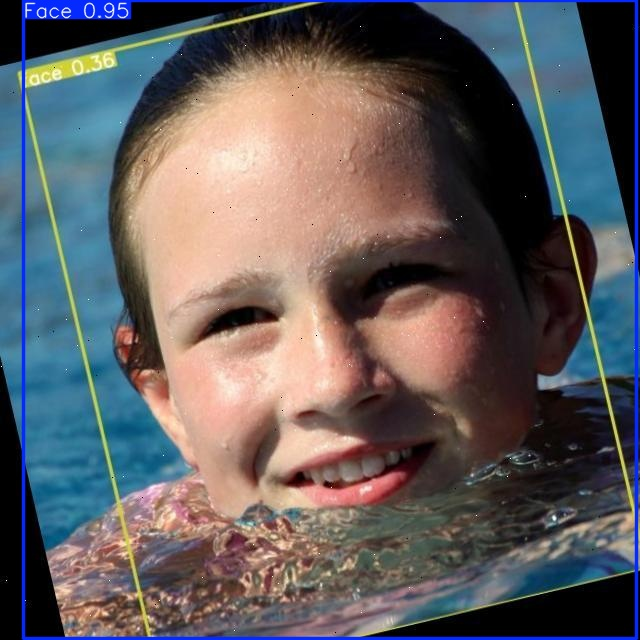

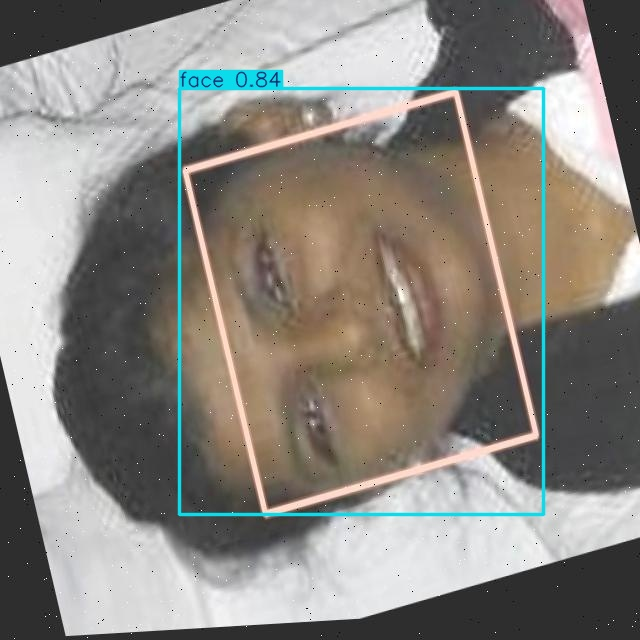

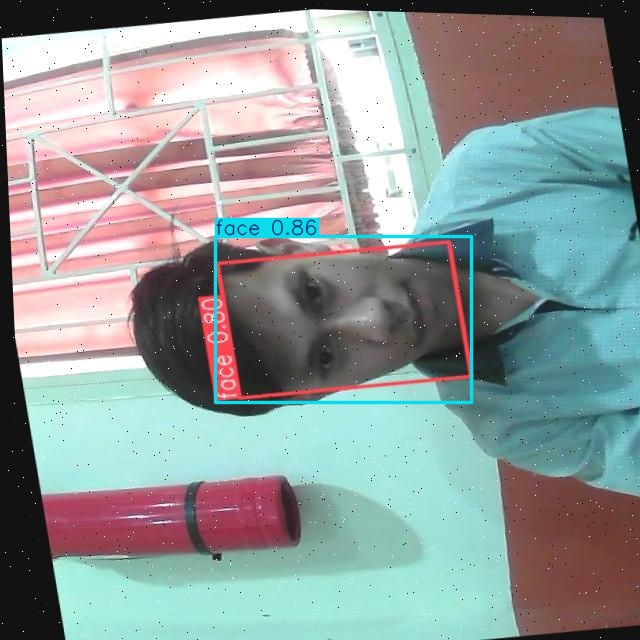

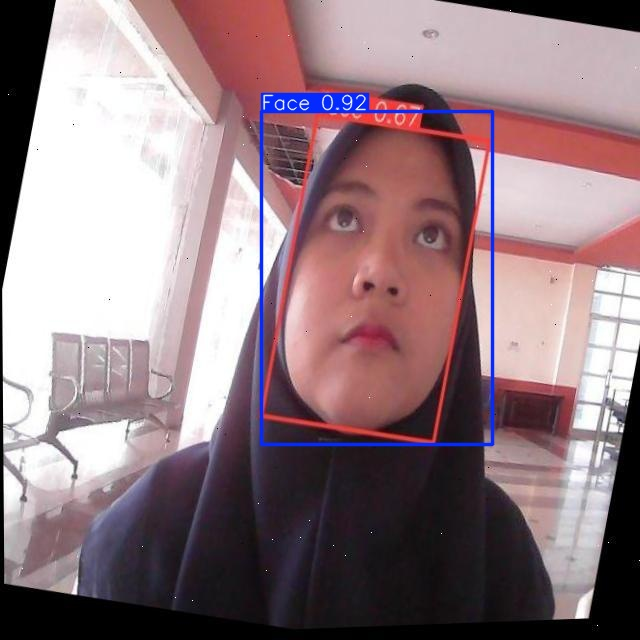

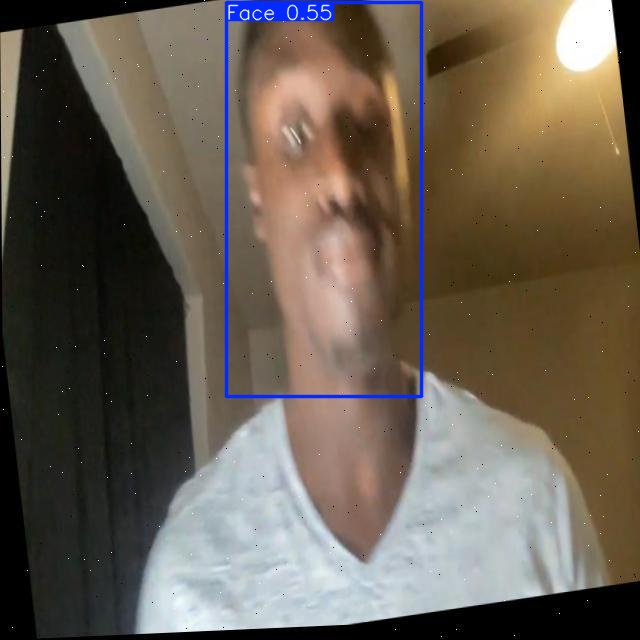

In [10]:
# import glob
# from IPython.display import Image, display
# i = 0
# for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg"): #assuming JPG
#     if i %15 ==0 :
#         print("\n")
#         display(Image(filename=imageName))
#     i = i +1
import glob
from IPython.display import Image, display

for i, imageName in enumerate(glob.glob("/kaggle/working/runs/detect/predict/*.jpg")):
    if i >= 5:  
        break
    display(Image(filename=imageName))